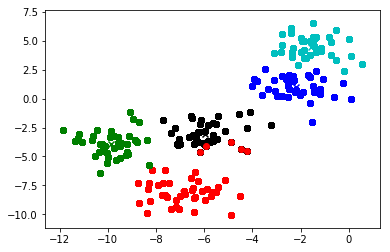

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import random
%matplotlib inline

X, y = make_blobs(n_samples=200, centers=5, n_features=2,random_state=1)
#print y
plt.scatter(X[:,0],X[:,1])

class Kmeans:
    
    def __init__(self,no_of_clusters=3,min_distance=.001,num_of_inter=20):
        self.no_of_clusters=no_of_clusters
        self.min_distance=min_distance
        self.num_of_inter=100
        # print 'init done'
    
    def fit(self,data):
        converged=False
        self.centroids=random.sample(data,self.no_of_clusters)
        # print centroids
        self.groups={}   # Groups as per each centroid
        for i in range(self.no_of_clusters):
            self.groups[i]=[]
        
        for i in range(self.num_of_inter):
            # Calculate distance of vector from all centroids and assign it to centroid from which 
            # it has minimum distance.
            for vector in data:
                distances=[self.distance(vector,self.centroids[i]) for i in range(self.no_of_clusters)]
                centroid_index=distances.index(min(distances))
                self.groups[centroid_index].append(vector)
            # print self.groups
        
            prev_centroids=self.centroids[:]
            self.centroids=[]
        
            # Calculate new centroids
            for key,list1 in self.groups.items():
                # print list1
                self.centroids.append(np.average(list1, axis = 0))
            # print prev_centroids
            # print self.centroids
            diff_of_centroids=[]
            for i in range(self.no_of_clusters):
                diff_of_centroids.append(self.distance(self.centroids[i],prev_centroids[i]))
            # print diff_of_centroids
            if max(diff_of_centroids) < .0001:
                break
        
    def distance(self,vector,centroid):
        no_of_features=len(vector)
        pythagoras_distance=0
        for i in range(no_of_features):
            pythagoras_distance+=math.pow((vector[i]-centroid[i]),2)
        return math.sqrt(pythagoras_distance)
         
model=Kmeans(5)
model.fit(X)
# print model.groups

# We will plot the clusters now
colors = 5*[ "b", "k", "r", "g", "c"]

for i,centroid in enumerate(model.centroids):
    plt.scatter(centroid[0], centroid[1], color=colors[i], marker = "x")

for group in model.groups:
    color = colors[group]
    for vector in model.groups[group]:
        plt.scatter(vector[0], vector[1], color = color)